In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tqdm import tqdm
import seaborn as sns

## Class that performs Linear Regression

In [2]:
class LogisticRegression():
    """Class that performs Logistic Regression
    
    Parameters:
    ---------------
    learningRate- The Learning Rate value
    tolerance- The tolerance
    maxIteration- The maximum number of iterations
    """
    
    def __init__(self, learningRate, tolerance, maxIteration=5000, removeIndex = False):
        """Function to initialise the parameters"""
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration

    def datasetReader(self):
        """Function that reads in the data and divides it into training and test set"""
        train_df = pd.read_excel('Lab3_data.xls', sheet_name='2004--2007 Data')
        test_df = pd.read_excel('Lab3_data.xls', sheet_name='2004--2005 Data')

        train_df, test_df = np.array(train_df, dtype=np.float64), np.array(test_df, dtype=np.float64)

        X_train, y_train = train_df[:, 1:], train_df[:, 0]
        X_test, y_test = test_df[:, 1], test_df[:, 0]

        return X_train, X_test, y_train, y_test

    def removeIndex(self, X_train, y_train):
        """Function that removes the indexes of the user's choice"""
        input_index = input('Enter the indexes you want to exlude:')
        input_index = input_index.split()
        input_index = [int(i) for i in input_index]
        print('Entered indexes are; ', input_index)

        X_train = np.delete(X_train, input_index, axis = 0)
        y_train = np.delete(y_train, input_index, axis = 0)


        return X_train, y_train

    def addX0(self, X):
        """Function to add a column of ones to the dataset"""
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def sigmoid(self, z):
        """Function that performns the sigmoid operation"""
        sig = 1 / (1 + np.exp(-z))
        
        return sig

    def costFunction(self, X, y):
        """Function that calculates the cost function"""
        # approach 1
        # pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)  # negetive log lokelyhood
        # cost = pred_.sum()

        # approach 2

        sig = self.sigmoid(X.dot(self.w))
        pred_ = y * np.log(sig) + (1 - y) * np.log(1 - sig)
        cost = pred_.sum()

        return cost

    def gradient(self, X, y):
        """Function that calculates the gradient"""
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        
        return grad

    def gradientDescent(self, X, y):
        """Function that performs gradient descent"""
        costSequence = []
        lastCost = float('inf')

        for i in tqdm(range(self.maxIteration)):
            
            self.w = self.w - self.learningRate * self.gradient(X, y)
            currentCost = self.costFunction(X, y)
            
            dif = lastCost - currentCost
            lastCost = currentCost
            costSequence.append(abs(currentCost))

            if dif < self.tolerance:
                print('The Model Has Stopped - No Further Improvement')
                break

        return

    def plotCost(self, costSequence):
        """Function that plots the cost over every iteration"""
        s = np.array(costSequence)
        t = np.array(s.size)

        s = costSequence
        t = list(range(0, len(costSequence)))

        fig, ax = plt.subplots()
        ax.plot(t, s)



        ax.set(xlabel = 'iterations', ylabel = 'cost', title = 'cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05, 1), shadow=True)
        plt.show()

    def predict(self, X):
        """Function that performs the prediction task"""
        sig = self.sigmoid(X.dot(self.w))
        
        return np.around(sig)

    def evaluate(self, y, y_hat):
        """Function that evaluates the predictions of the model"""
        y = (y == 1)
        y_hat = (y_hat == 1)

        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()

        return accuracy, recall, precision

    def plot(self):
        
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1],
                     self.sigmoid(self.X_train.dot(self.w)),
                     c=self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation=0)
        plt.show()

    def scatterPlt(self):
        
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14, 12))

        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        ax.scatter(self.X_train[:, 0], self.X_train[:, 1],
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        plt.show()

    def plot3D(self):
        
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))

        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14, 12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1],
                     c=self.y_train[:], s=50,
                     cmap="RdBu", vmin=-.2, vmax=1.2,
                     edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

    def runModel(self):
        """Function to run the model"""
        self.X_train, self.X_test, self.y_train, self.y_test = self.datasetReader()
        print(self.X_train.shape)

        self.w = np.ones(self.X_train.shape[1], dtype=np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        print(self.w)

        y_hat_train = self.predict(self.X_train)
        accuracy, recall, precision = self.evaluate(self.y_train, y_hat_train)

        print('Training Accuracy: ', accuracy)
        print('Training Recall: ', recall)
        print('Training precision: ', precision)
        print('--------------------------------')
        print('Results without outliers', '\n'*5)

        self.X_train, self.y_train = self.removeIndex(self.X_train, self.y_train)
        print(self.X_train.shape, self.y_train.shape)

        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        print(self.w)

        y_hat_train = self.predict(self.X_train)
        accuracy, recall, precision = self.evaluate(self.y_train, y_hat_train)

        print('Training Accuracy: ', accuracy)
        print('Training Recall: ', recall)
        print('Training precision: ', precision)

        self.scatterPlt()
        self.plot()
        self.plot3D()
        

In [3]:
lr = LogisticRegression(tolerance=0.01, learningRate=0.001)

  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]<ipython-input-2-06c6e011300d>:61: RuntimeWarning: divide by zero encountered in log
  pred_ = y * np.log(sig) + (1 - y) * np.log(1 - sig)
<ipython-input-2-06c6e011300d>:61: RuntimeWarning: invalid value encountered in multiply
  pred_ = y * np.log(sig) + (1 - y) * np.log(1 - sig)
 99%|██████████████████████████████████████████████████████████████████████████▎| 4952/5000 [00:00<00:00, 25132.02it/s]

(95, 2)


100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 24455.44it/s]


[-29.54880512  15.55862184]
Training Accuracy:  0.8736842105263158
Training Recall:  1.0
Training precision:  0.8604651162790697
--------------------------------
Results without outliers 







Enter the indexes you want to exlude: 0 38


100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 33873.49it/s]

Entered indexes are;  [0, 38]
(93, 2) (93,)
[-23.27434708  10.5657938 ]
Training Accuracy:  0.8172043010752689
Training Recall:  0.8082191780821918
Training precision:  0.9516129032258065


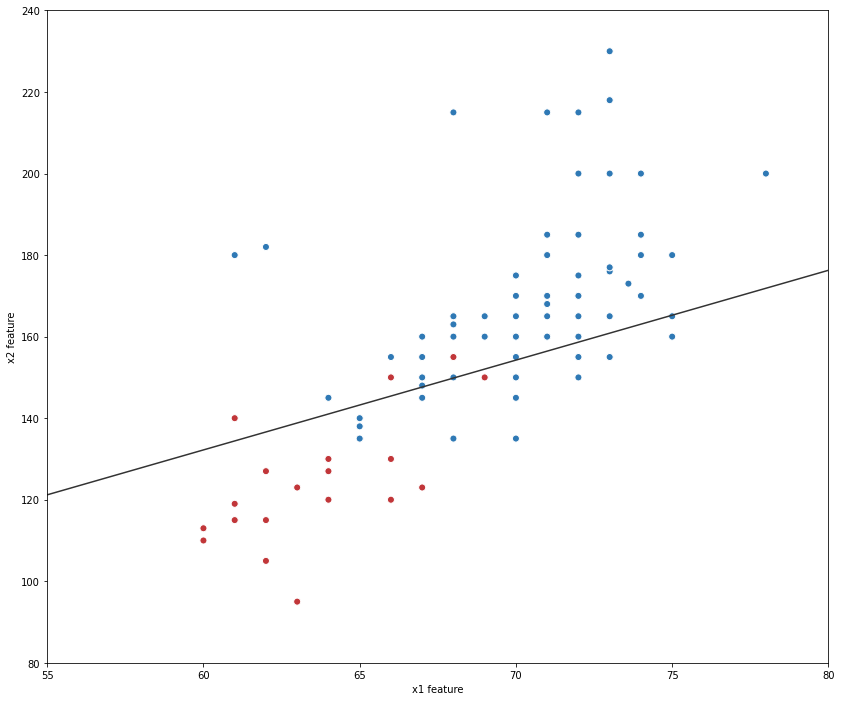

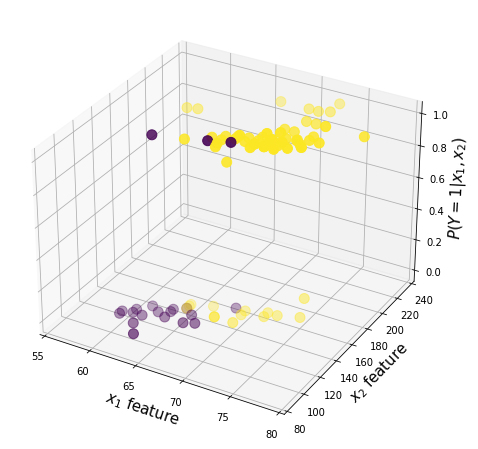

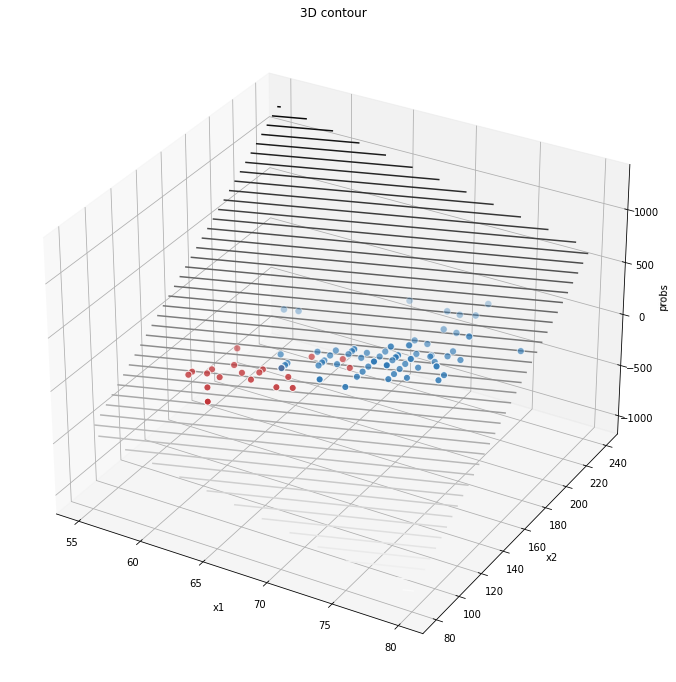

In [4]:
lr.runModel()